In [2]:
import sys
sys.path.insert(0,'/workspaces/RAG_secure_code_generation/src')
sys.path.insert(0,'/workspaces/RAG_secure_code_generation')
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt
import json

In [3]:
sns.color_palette("hls", 8)


[(0.86, 0.3712, 0.33999999999999997),
 (0.86, 0.7612000000000001, 0.33999999999999997),
 (0.5688000000000001, 0.86, 0.33999999999999997),
 (0.33999999999999997, 0.86, 0.5012000000000001),
 (0.33999999999999997, 0.8287999999999999, 0.86),
 (0.33999999999999997, 0.43879999999999986, 0.86),
 (0.6311999999999998, 0.33999999999999997, 0.86),
 (0.86, 0.33999999999999997, 0.6987999999999996)]

In [4]:
summary_file = "../../experiments/task_detect_xss_simple_prompt/experiments_summary.csv"


In [5]:
df = pd.read_csv(summary_file)
df.head()

,Unnamed: 0,successes,failures,total,accuracy,accuracy_std,accuracy_var,precision,precision_std,precision_var,...,top_15_accuracy_var,top_15_precision,top_15_precision_std,top_15_precision_var,top_15_recall,top_15_recall_std,top_15_recall_var,top_15_f1,top_15_f1_std,top_15_f1_var
0,0,26,24,50,0.824395,0.178259,0.031776,0.912464,0.168308,0.028328,...,0.000874,0.996499,0.012615,1.591488e-04,0.897792,0.061511,0.003784,0.943276,0.033227,0.001104
1,1,48,2,50,0.810401,0.096359,0.009285,0.984112,0.048586,0.002361,...,0.000991,0.990049,0.016303,2.657746e-04,0.841379,0.066880,0.004473,0.907984,0.036468,0.001330
2,2,50,0,50,0.753852,0.087768,0.007703,0.986990,0.050529,0.002553,...,0.003021,0.957281,0.085145,7.249714e-03,0.810801,0.123032,0.015137,0.867570,0.066808,0.004463
3,3,41,9,50,0.857796,0.089478,0.008006,0.983858,0.079654,0.006345,...,0.000547,0.999958,0.000084,7.096399e-09,0.832950,0.046302,0.002144,0.908178,0.026373,0.000696
4,4,46,4,50,0.821102,0.105810,0.011196,0.998225,0.003683,0.000014,...,0.000093,0.996934,0.004119,1.696218e-05,0.901709,0.020339,0.000414,0.946791,0.010675,0.000114


In [6]:
#set examples_per_class to 0 everytime generation_mode = zero_shot
df.loc[df['generation_mode'] == 'zero_shot', 'examples_per_class'] = 0

In [7]:
df = df[df['generation_mode'].isin(['zero_shot', 'few_shot'])]

In [8]:
df = df[['model_name', 'temperature', 'examples_per_class', 'folder']]


In [9]:
def from_folder_to_accuracy_list(folder:str)->list:
    folder = os.path.join('../..', folder)
    #find all the subfolder in folder:
    subfolders = [f.path for f in os.scandir(folder) if f.is_dir() ]
    #map subfolder to the dict conteined in results.json file
    results = []
    for subfolder in subfolders:
        with open(os.path.join(subfolder, 'results.json')) as f:
            results.append(json.load(f))
    #keep only the results where failed is False
    results = [r for r in results if not r['failed']]
    #map results to accuracy
    results = [r['results']['accuracy'] for r in results]
    return results
    

In [10]:
df.head()

,model_name,temperature,examples_per_class,folder
5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...
6,gpt-4-1106-preview,0.0,0,experiments/task_detect_xss_simple_prompt/temp...
7,gpt-4-1106-preview,1.0,0,experiments/task_detect_xss_simple_prompt/temp...
8,gpt-4-1106-preview,0.5,10,experiments/task_detect_xss_simple_prompt/temp...
9,gpt-4-1106-preview,0.0,10,experiments/task_detect_xss_simple_prompt/temp...


In [11]:
df['accuracy'] = df['folder'].map(from_folder_to_accuracy_list)

In [12]:
df.head()

,model_name,temperature,examples_per_class,folder,accuracy
5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,"[0.7030241563710123, 0.7497695002765997, 0.844..."
6,gpt-4-1106-preview,0.0,0,experiments/task_detect_xss_simple_prompt/temp...,"[0.49400700719159135, 0.8457495851004979, 0.64..."
7,gpt-4-1106-preview,1.0,0,experiments/task_detect_xss_simple_prompt/temp...,"[0.5019361976765628, 0.928452885856537, 0.9205..."
8,gpt-4-1106-preview,0.5,10,experiments/task_detect_xss_simple_prompt/temp...,"[0.8780195463765443, 0.7567766918679698, 0.930..."
9,gpt-4-1106-preview,0.0,10,experiments/task_detect_xss_simple_prompt/temp...,"[0.5217591738889913, 0.512539184952978, 0.8579..."


In [13]:
#explode the accuracy list
df = df.explode('accuracy')
df.head()

,model_name,temperature,examples_per_class,folder,accuracy
5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.703024
5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.74977
5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.84492
5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.636825
5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.845934


In [14]:
#reinitialize the index
df = df.reset_index(drop=False)
df.head()

,index,model_name,temperature,examples_per_class,folder,accuracy
0,5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.703024
1,5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.74977
2,5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.84492
3,5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.636825
4,5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.845934


In [15]:
df["model_temperature"] = df["model_name"] + "_" + df["temperature"].astype(str)



In [16]:
df.examples_per_class.unique()

array([ 0, 10, 20,  2,  3,  1, 15,  5])

In [17]:
df.head()

,index,model_name,temperature,examples_per_class,folder,accuracy,model_temperature
0,5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.703024,gpt-4-1106-preview_0.5
1,5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.74977,gpt-4-1106-preview_0.5
2,5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.84492,gpt-4-1106-preview_0.5
3,5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.636825,gpt-4-1106-preview_0.5
4,5,gpt-4-1106-preview,0.5,0,experiments/task_detect_xss_simple_prompt/temp...,0.845934,gpt-4-1106-preview_0.5


/tmp/ipykernel_303213/40868989.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


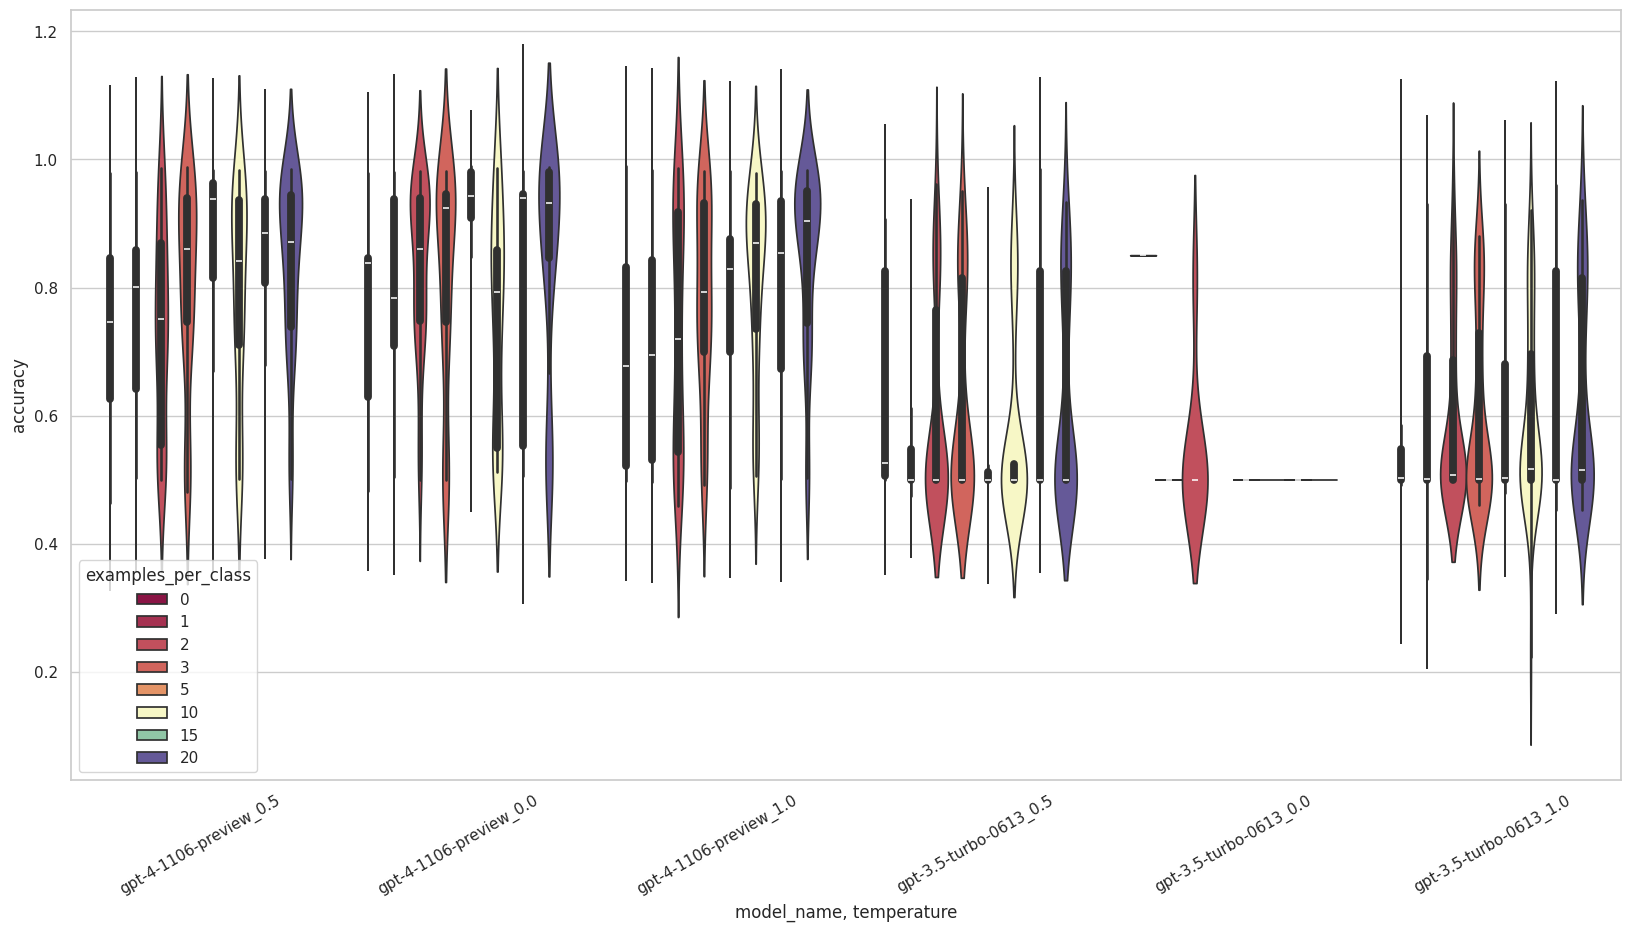

In [18]:
#draw boxplot  per model-temperature pair and examples_per_class
sns.set_theme(style="whitegrid")
#make figure larger
plt.figure(figsize=(20, 10))
ax = sns.violinplot(x="model_temperature", y="accuracy", hue="examples_per_class", data=df, palette="Spectral", legend = "full")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xlabel("model_name, temperature")
ax.set_ylabel("accuracy")
#set legend using the hue values present in the dataset
plt.show()


/tmp/ipykernel_303213/1625926910.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


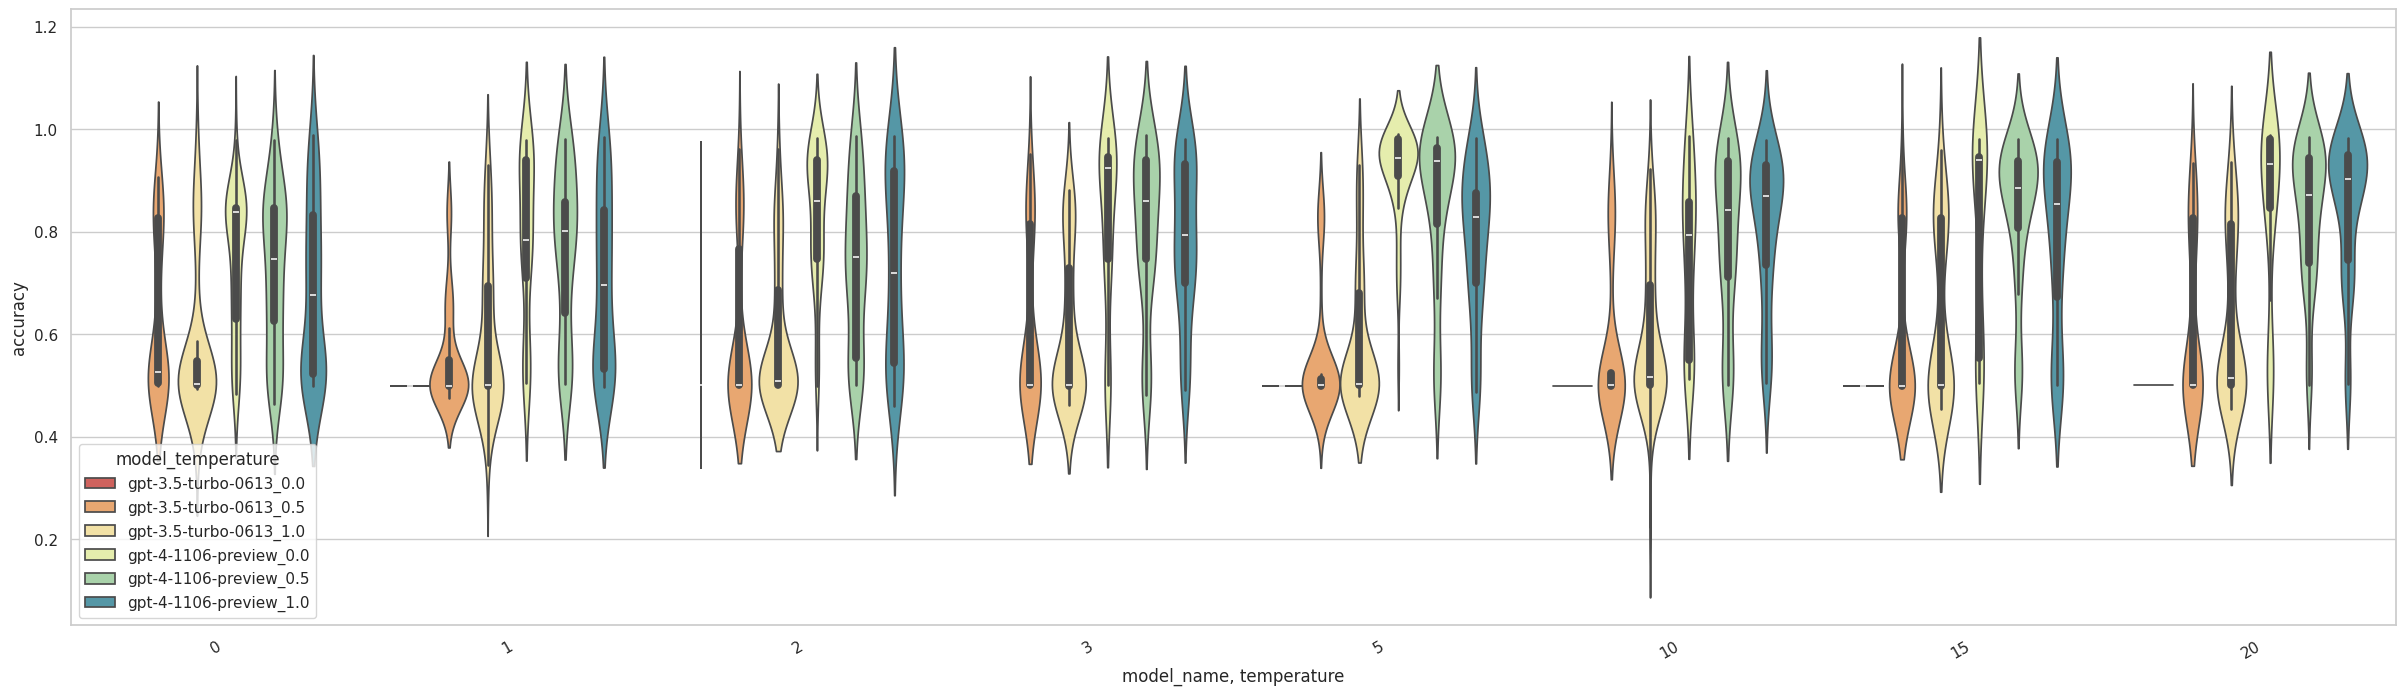

In [19]:
#draw boxplot  per model-temperature pair and examples_per_class
hue_order = df.groupby('model_temperature')["model_temperature"].first().sort_values().index

sns.set_theme(style="whitegrid")
#make figure larger
plt.figure(figsize=(30, 8))
ax = sns.violinplot(x="examples_per_class", y="accuracy", hue="model_temperature", hue_order = hue_order,data=df, palette="Spectral", legend = "brief")
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
ax.set_xlabel("model_name, temperature")
ax.set_ylabel("accuracy")
#set legend using the hue values present in the dataset
plt.show()


<Figure size 3500x1500 with 0 Axes>

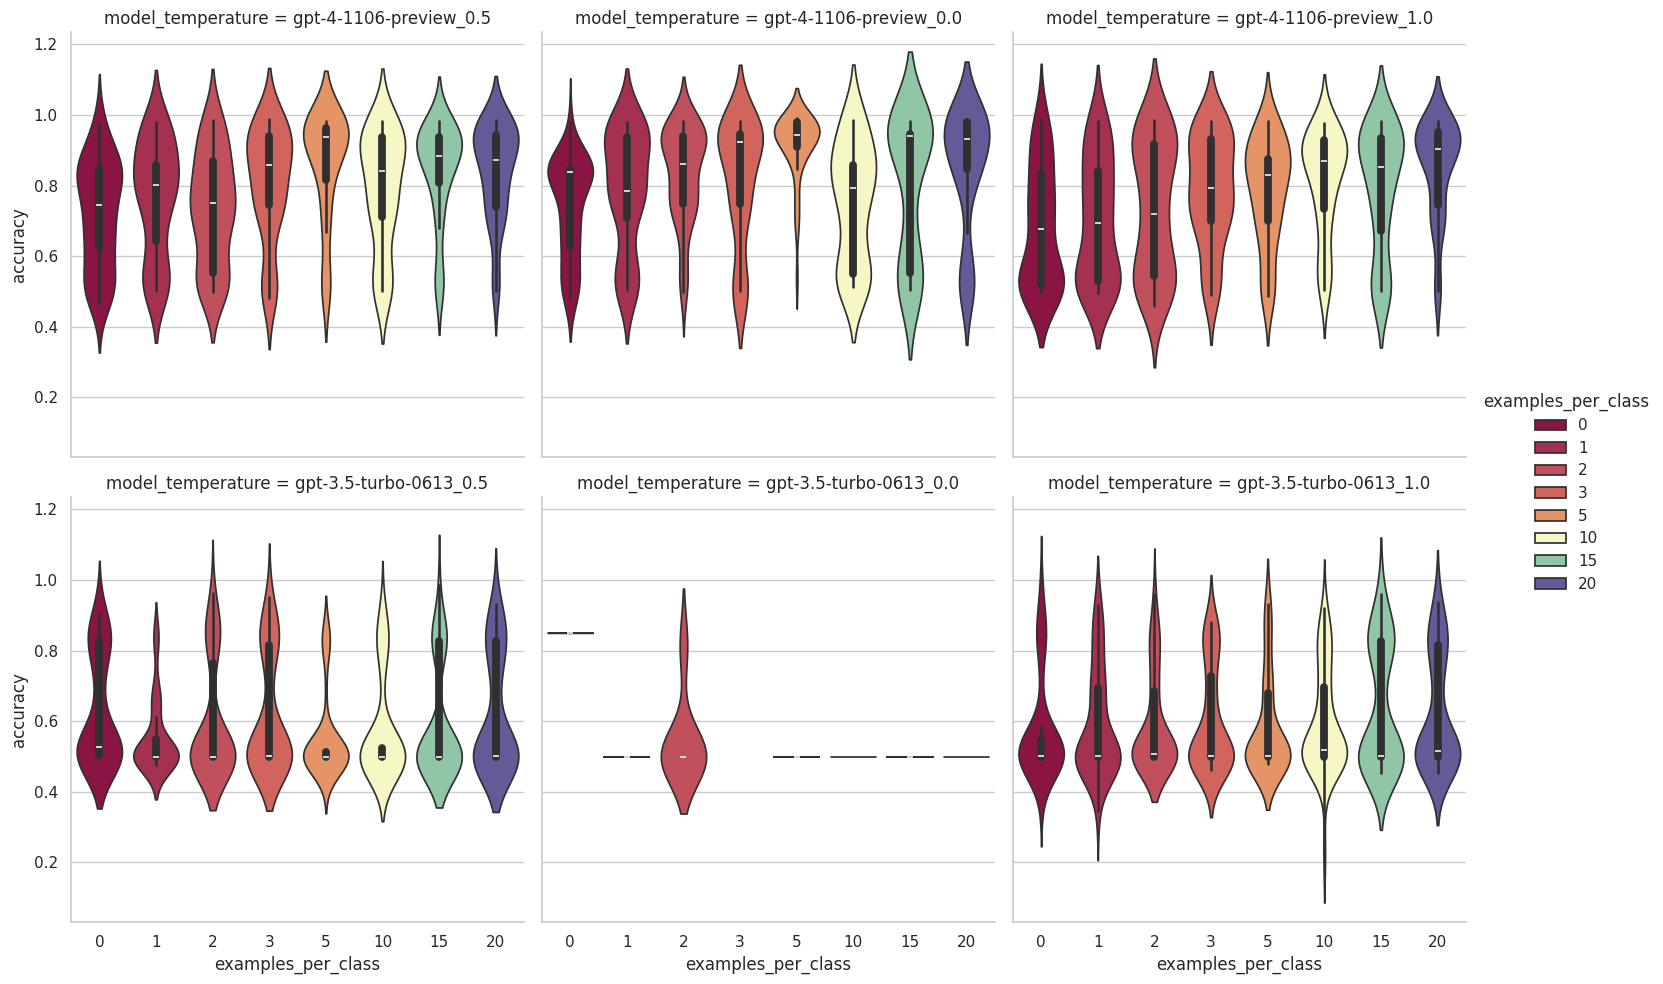

In [22]:
#draw the catplot
sns.set_theme(style="whitegrid")
#make figure larger
plt.figure(figsize=(35, 15))
ax = sns.catplot(x="examples_per_class",col="model_temperature", y="accuracy", hue = "examples_per_class", kind="violin", data=df, col_wrap =3, palette="Spectral", legend="full")
#show legends with color
#set legend using the hue values present in the datase
#plt.legend(title='examples_per_class')
#plt.show()

<Figure size 3500x1500 with 0 Axes>

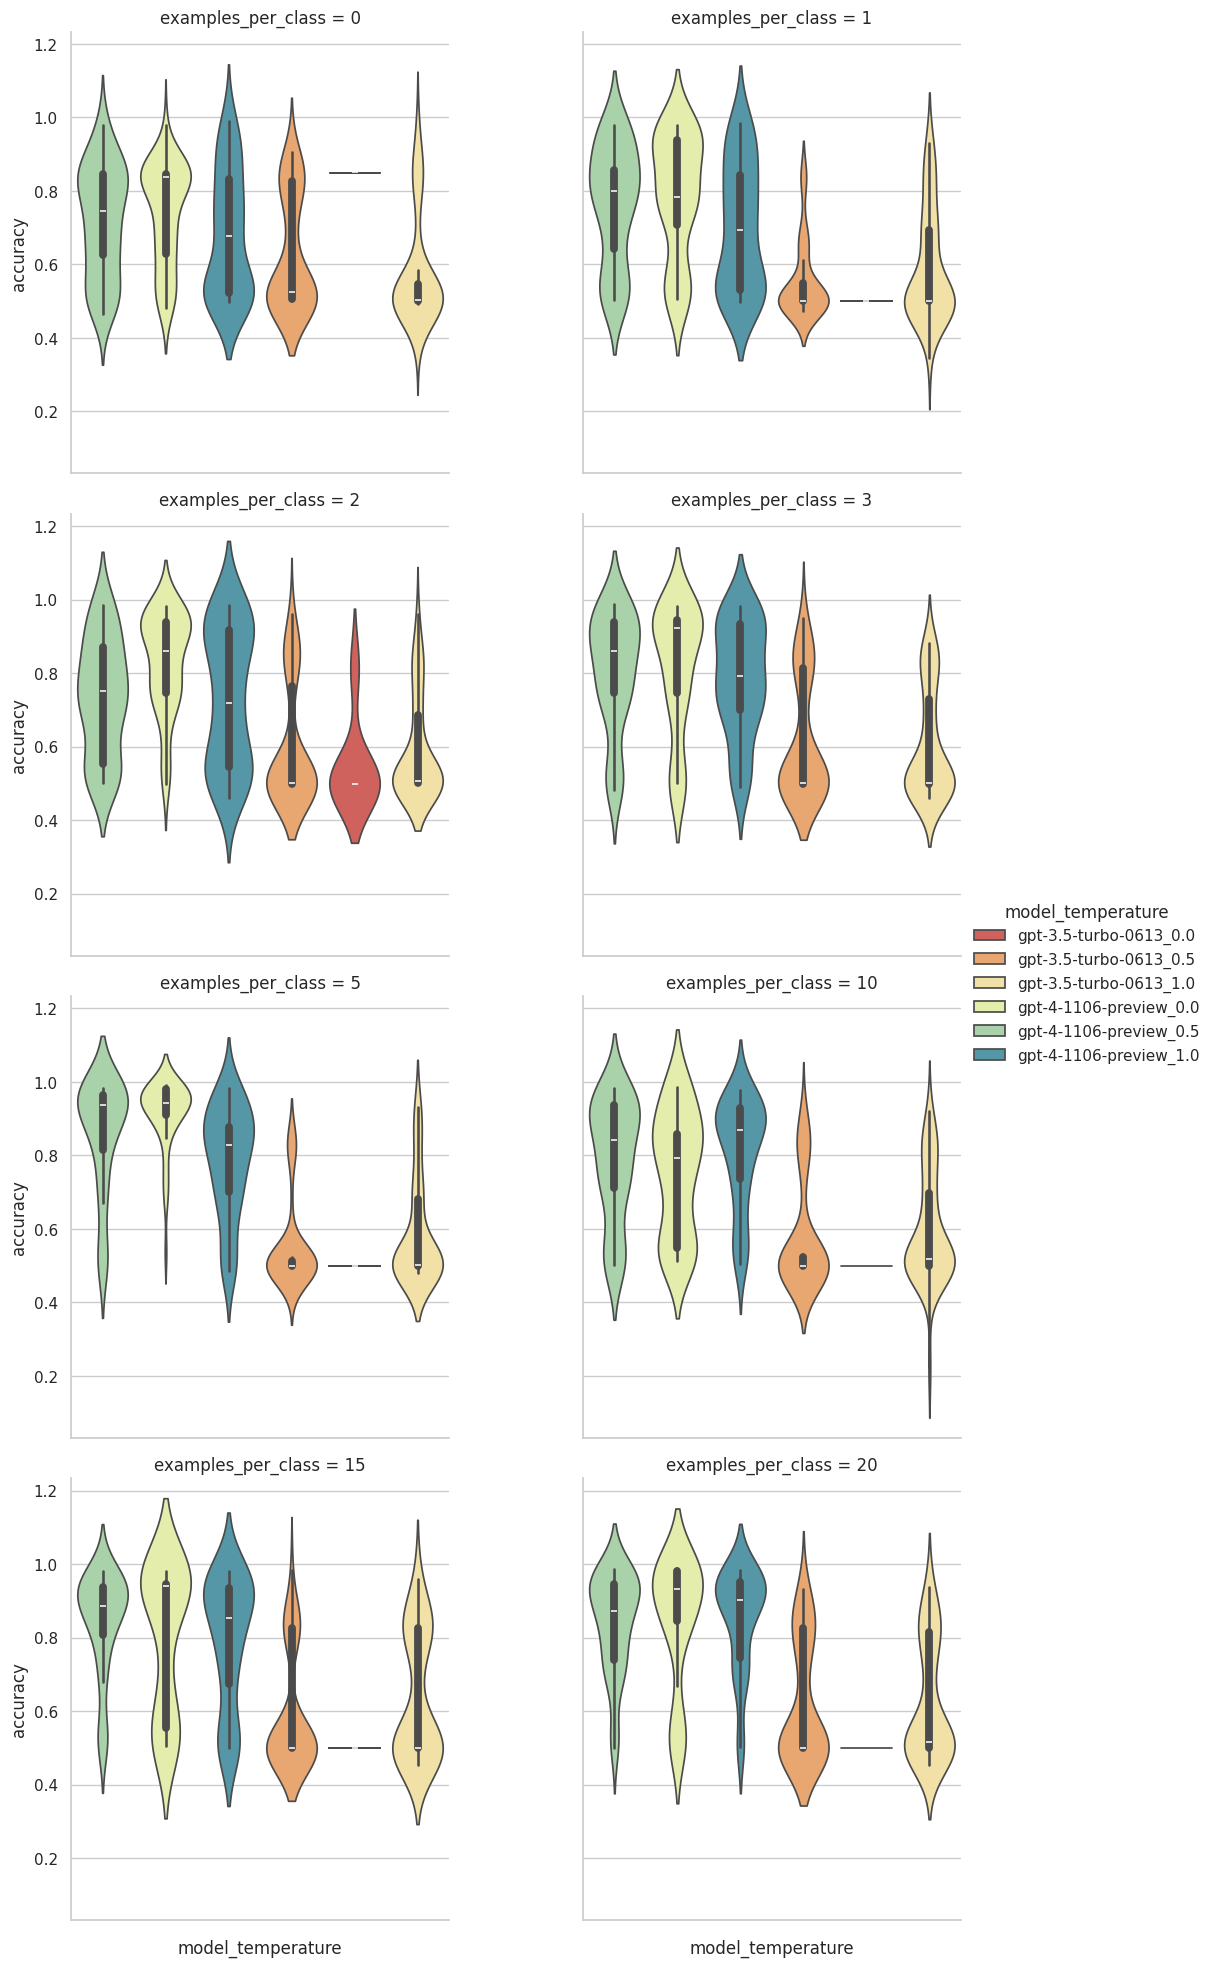

In [21]:
hue_order = df.groupby('model_temperature')["model_temperature"].first().sort_values().index
#draw the catplot
sns.set_theme(style="whitegrid")
#make figure larger
plt.figure(figsize=(35, 15))
ax = sns.catplot(x="model_temperature",col="examples_per_class", y="accuracy", hue = "model_temperature", hue_order = hue_order, kind="violin", data=df, col_wrap =2, palette="Spectral", legend="full")
#hide x labels
ax.set_xticklabels([])
#show legend
